## New rigidity definition

In [2]:
import os
import glob
import matplotlib               # type: ignore
import numpy             as np  # type: ignore
import matplotlib.pyplot as plt # type: ignore
import matplotlib.colors as mcolors
import platform
from   pathlib           import Path
import importlib
import readFiles
import seaborn as sns
import pandas as pd
from tqdm import tqdm
import networkx as nx
importlib.reload(readFiles)

# Matplotlib rc parameters modification
plt.rcParams.update({
  "figure.max_open_warning" : 0,
  "text.usetex"             : True,
  "text.latex.preamble"     : r"\usepackage{amsmath, bm, type1cm}",  # Added \bm for bold math
  "figure.autolayout"       : True,
  "font.family"             : "STIXGeneral",
  "mathtext.fontset"        : "stix",
  "font.size"               : 8,
  "xtick.labelsize"         : 8,
  "ytick.labelsize"         : 8,
  "lines.linewidth"         : 1,
  "lines.markersize"        : 5,
})
#plt.rcParams['text.latex.preamble']= r"\usepackage{amsmath}"
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'

colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']


if platform.system() == 'Darwin':  # macOS
    topDir = Path("/Volumes/rahul_2TB/high_bidispersity/new_data/")
    fig_save_path = Path("/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/ang_vel/")
elif platform.system() == 'Linux':
    topDir = Path("/media/rahul/rahul_2TB/high_bidispersity/new_data/")
    fig_save_path = Path("/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/ang_vel/")
else:
    raise OSError("Unsupported OS")

## Understanding if a particle is part of multiple rigid clusters

In [59]:
## Angular velocity vs neighbouring k particle angular velocity
# Some simulation parameters

from collections import Counter

npp  = 1000
run  = 1
phi  = [0.72, 0.74, 0.77]
vr   = '0.5'
ar   = 1.4 #[1.0, 1.4, 2.0, 4.0]
off  = 100

repeat_counts = np.zeros([len(phi), 3]) # rows, columns

for ii, phii in enumerate(phi):
    phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
    dataname = f"{topDir}/NP_{npp}/phi_{phir}/ar_{ar}/Vr_{vr}/run_{run}"  
    rigFile  = open(glob.glob(f'{dataname}/rig_*.dat' )[0], 'r')
    rigdata  = readFiles.rigList(rigFile)
    
    rigdatalist = []
    for i, sublist1 in enumerate(rigdata[off:]):
        temp = []
        for j, sublist2 in enumerate(sublist1):
            rigset = set(sublist2)
            temp.extend(rigset)
        rigdatalist.append(temp)
    
    for framerig in rigdatalist:
        counts = Counter(framerig)
        
        for j in range(3):
            countss = [item for item, count in counts.items() if count == j+1] # once, twice or thrice
            repeat_counts[ii,j] += len(countss)

In [60]:
repeat_counts

array([[1.22282e+05, 8.90000e+01, 0.00000e+00],
       [2.17030e+05, 2.18000e+02, 0.00000e+00],
       [8.37894e+05, 2.92000e+02, 0.00000e+00]])

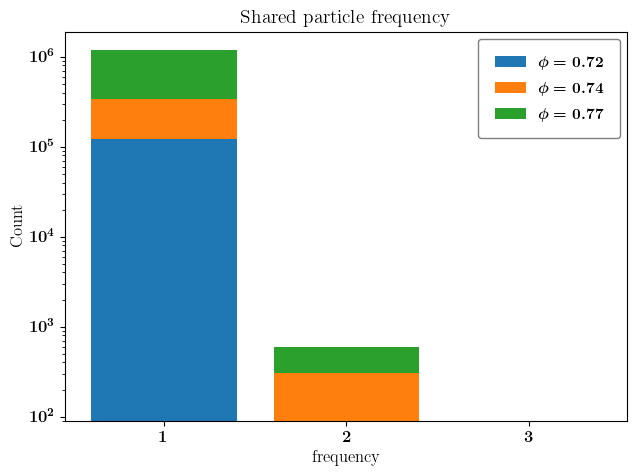

In [91]:
x = np.arange(1, repeat_counts.shape[1]+1)
bottom = np.zeros_like(x, dtype=float) 

for i in range(repeat_counts.shape[0]):
    plt.bar(x, repeat_counts[i], bottom=bottom, label=fr'$\phi = {phi[i]}$')
    bottom += repeat_counts[i]

plt.xlabel('frequency', fontweight='bold', fontsize=12)
plt.ylabel('Count', fontweight='bold', fontsize=12)
plt.title('Shared particle frequency', fontweight='bold', fontsize=14)
plt.xticks(x, fontsize=12)  
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=11, frameon=True, framealpha=0.5, facecolor='white', 
           edgecolor='black', borderpad=1.1, labelspacing=0.8)
plt.tight_layout()
plt.yscale('log')
plt.savefig(f"{fig_save_path}/shared_particle_frequency.png", bbox_inches="tight", dpi=800, transparent=False)
plt.show()

In [66]:
## number of clusters

## Angular velocity vs neighbouring k particle angular velocity
# Some simulation parameters

from collections import Counter

npp  = 1000
run  = 1
phi  = [0.72, 0.74, 0.77]
vr   = '0.5'
ar   = 1.4 #[1.0, 1.4, 2.0, 4.0]
off  = 100

meancount = []
stdcount  = []

for ii, phii in enumerate(phi):
    phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
    dataname = f"{topDir}/NP_{npp}/phi_{phir}/ar_{ar}/Vr_{vr}/run_{run}"  
    rigFile  = open(glob.glob(f'{dataname}/rig_*.dat' )[0], 'r')
    rigdata  = readFiles.rigList(rigFile)
    
    clustercount = []
    for i, sublist1 in enumerate(rigdata[off:]):
        temp = []
        for j, sublist2 in enumerate(sublist1):
            rigset = set(sublist2)
            temp.append(rigset)
        clustercount.append(len(temp))
    
    
    meancount.append(np.mean(clustercount))
    stdcount.append(np.std(clustercount))

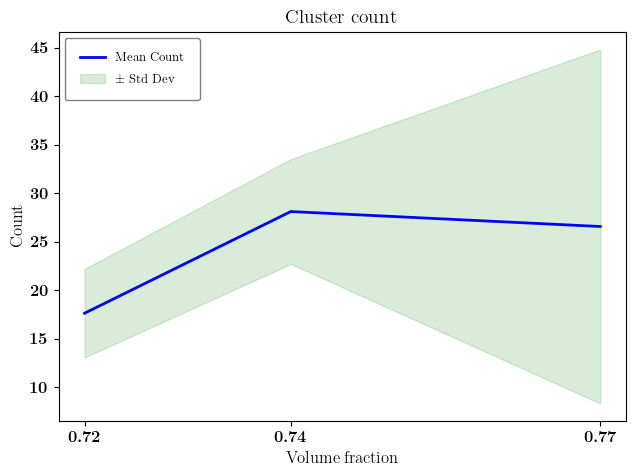

In [92]:
x = np.arange(len(meancount))  # e.g., [0, 1, 2]

# Convert to numpy arrays for convenience
meancount = np.array(meancount)
stdcount = np.array(stdcount)

# Plot mean line
plt.plot(phi, meancount, linewidth=2,label='Mean Count', color='blue')

# Plot shaded std region
plt.fill_between(phi, meancount - stdcount, meancount + stdcount,
                 color='green', alpha=0.15, label='± Std Dev')

plt.xlabel('Volume fraction', fontweight='bold', fontsize=12)
plt.ylabel('Count', fontweight='bold', fontsize=12)
plt.title('Cluster count', fontweight='bold', fontsize=14)
plt.xticks(phi, fontsize=12)  
plt.yticks(fontsize=12)
plt.legend(loc='upper left', fontsize=9, frameon=True, framealpha=0.5, facecolor='white', 
           edgecolor='black', borderpad=1.2, labelspacing=0.8)
plt.grid(False)
plt.tight_layout()
plt.savefig(f"{fig_save_path}/cluster_count.png", bbox_inches="tight", dpi=800, transparent=False)
plt.show()

In [6]:
rigList = [item in sublist1 for subset2 in subset3 for subset3 in rigdata for subset2 in subset3 for item in set(sublist1)]

In [34]:
rigdatalist = []
for i, sublist1 in enumerate(rigdata):
    temp = []
    for j, sublist2 in enumerate(sublist1):
        rigset = set(sublist2)
        temp.extend(rigset)
    rigdatalist.append(temp)
    #print(f"rigdata[{i}][{j}] set: {rigset}")

In [37]:
len(rigdatalist[1404])

194

In [38]:
len(np.unique(rigdatalist[1404]))

194

In [ ]:
rigListFlat = [item for sublist in rigdata]

In [11]:
rigdata -- > rigdata[100] -- > rigdata[100][3]

[480, 493, 480, 696, 493, 696]

In [20]:
## Angular velocity vs neighbouring k particle angular velocity
# Some simulation parameters

npp  = 1000
run  = 1
phi  = 0.76
vr   = '0.5'
ar   = 1.4 #[1.0, 1.4, 2.0, 4.0]
off  = 100
k    = 6   # number of minimum values
phir = '{:.3f}'.format(phi) if len(str(phi).split('.')[1])>2 else '{:.2f}'.format(phi)

dataname = f"{topDir}/NP_{npp}/phi_{phir}/ar_{ar}/Vr_{vr}/run_{run}"  
parFile  = open(glob.glob(f'{dataname}/par_*.dat' )[0], 'r')
rigFile  = open(glob.glob(f'{dataname}/rig_*.dat' )[0], 'r')
intFile  = open(glob.glob(f'{dataname}/int_*.dat' )[0], 'r')
pardata  = readFiles.readParFile(parFile)
rigdata  = readFiles.rigList(rigFile)
intList  = readFiles.interactionsList(intFile)
parLines = open(glob.glob(f'{dataname}/par_*.dat' )[0], 'r').readlines()
lx       = float(parLines[3].split()[2]) 
lz       = float(parLines[5].split()[2])

frame = 300
px    = pardata[frame][:,2]
pz    = pardata[frame][:,3]
pr    = pardata[frame][:,1]

frameList  = intList[frame]
contAngles = {k: [] for k in range(npp)}

for ii in range(frameList.shape[0]):
    p1 = frameList[ii,  0]
    p2 = frameList[ii,  0]
    nx = frameList[ii,  2]
    ny = frameList[ii,  4]
    contState = frameList[ii,  10]
    contAngp1 = np.arctan2(ny,   nx)
    contAngp2 = np.arctan2(-ny, -nx)
    
    #if contState == 2:
    contAngles[p1].append(contAngp1)
    contAngles[p2].append(contAngp2)

In [3]:
def is_particle_rigid(contact_angles_rad):
    """
    Check if a particle is rigid based on contact angles.
    
    Parameters:
    - contact_angles_rad: list or array of contact angles in radians
    
    Returns:
    - True if rigid, False otherwise
    """
    # Convert to degrees and map to [0, 360)
    angles_deg = np.degrees(contact_angles_rad) % 360
    
    # Define sectors (in degrees)
    sector_1 = (0, 120)
    sector_2 = (120, 240)
    sector_3 = (240, 360)
    
    # Check for presence in each sector
    in_sector_1 = np.any((angles_deg >= sector_1[0]) & (angles_deg < sector_1[1]))
    in_sector_2 = np.any((angles_deg >= sector_2[0]) & (angles_deg < sector_2[1]))
    in_sector_3 = np.any((angles_deg >= sector_3[0]) & (angles_deg < sector_3[1]))
    
    return in_sector_1 and in_sector_2 and in_sector_3

In [21]:
rigid_flags = {}
for pid, angles in contAngles.items():
    rigid_flags[pid] = is_particle_rigid(angles)

# rigid_flags[pid] will be True if particle is rigid

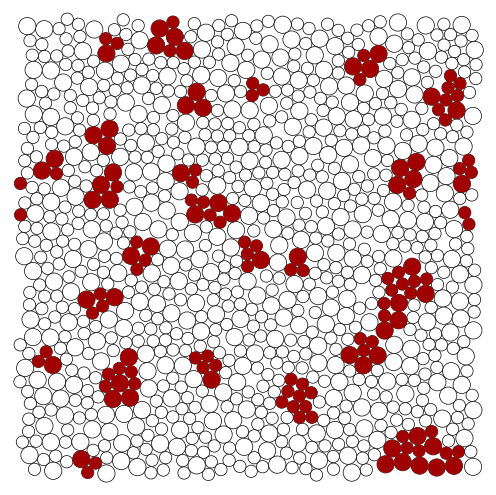

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(5,5), dpi = 100)
newLx   = lx + 2*np.max(pr)
newLz   = lz + 2*np.max(pr)

allPart    = np.arange(npp)
rigPart    = set(int(item) for sublist in rigdata[frame] for item in sublist)
notRigPart = allPart[~np.isin(allPart, rigPart)]
  
ax.clear()
for index in notRigPart:
    index  = int(index)
    circle = plt.Circle((px[index],pz[index]), pr[index], facecolor='w', edgecolor='k', linewidth=0.5, zorder=1)
    ax.add_artist(circle)

for index in rigPart:
    circle = plt.Circle((px[index],pz[index]), pr[index], facecolor='#A00000', edgecolor=None, zorder=2)
    ax.add_artist(circle)

ax.set_xlim([-(newLx/2+0.2),(newLx/2+0.2)])
ax.set_ylim([-(newLz/2+0.2),(newLz/2+0.2)])
ax.axis('off')
ax.set_aspect('equal')
plt.show()

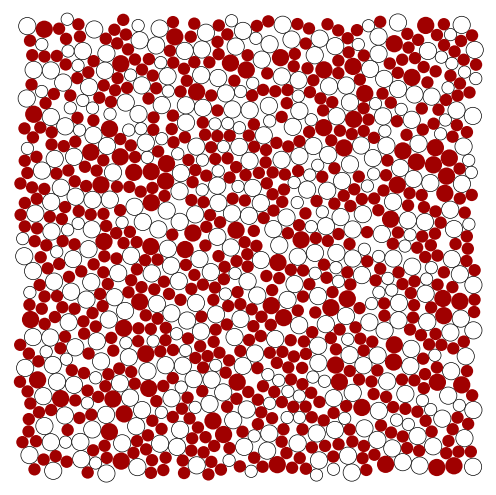

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(5,5), dpi = 100)
newLx   = lx + 2*np.max(pr)
newLz   = lz + 2*np.max(pr)

allPart    = np.arange(npp)
rigPart    = np.array([int(k) for k, v in rigid_flags.items() if v])
notRigPart = allPart[~np.isin(allPart, rigPart)]
  
ax.clear()
for index in notRigPart:
    index  = int(index)
    circle = plt.Circle((px[index],pz[index]), pr[index], facecolor='w', edgecolor='k', linewidth=0.5, zorder=1)
    ax.add_artist(circle)

for index in rigPart:
    circle = plt.Circle((px[index],pz[index]), pr[index], facecolor='#A00000', edgecolor=None, zorder=2)
    ax.add_artist(circle)

ax.set_xlim([-(newLx/2+0.2),(newLx/2+0.2)])
ax.set_ylim([-(newLz/2+0.2),(newLz/2+0.2)])
ax.axis('off')
ax.set_aspect('equal')
plt.show()

In [18]:
rigPart

array([ True,  True, False,  True,  True, False,  True, False,  True,
        True,  True, False,  True,  True, False, False, False,  True,
        True,  True,  True, False, False,  True,  True,  True, False,
        True,  True, False,  True,  True, False, False, False, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
       False,  True,  True, False,  True, False, False,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
       False,  True, False,  True,  True, False, False,  True, False,
        True,  True,  True,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True, False,  True,
       False,  True, False,  True,  True,  True, False,  True, False,
       False, False,

In [28]:
flat_set = set(item for sublist in rigdata[frame] for item in sublist)

In [26]:
set(flat_list)

{4,
 13,
 18,
 28,
 30,
 31,
 37,
 44,
 61,
 66,
 75,
 81,
 83,
 86,
 105,
 128,
 131,
 140,
 144,
 145,
 148,
 151,
 162,
 170,
 178,
 205,
 234,
 236,
 258,
 267,
 279,
 283,
 285,
 295,
 303,
 317,
 327,
 332,
 339,
 340,
 344,
 349,
 355,
 359,
 366,
 373,
 374,
 385,
 397,
 400,
 404,
 412,
 439,
 440,
 442,
 458,
 462,
 467,
 476,
 484,
 490,
 492,
 503,
 505,
 511,
 514,
 532,
 534,
 539,
 540,
 551,
 556,
 565,
 567,
 594,
 597,
 599,
 604,
 612,
 627,
 634,
 635,
 645,
 652,
 657,
 664,
 670,
 685,
 693,
 698,
 705,
 708,
 711,
 714,
 747,
 760,
 779,
 780,
 782,
 785,
 792,
 804,
 805,
 808,
 815,
 821,
 822,
 823,
 829,
 831,
 832,
 834,
 840,
 853,
 855,
 856,
 870,
 872,
 876,
 892,
 894,
 895,
 901,
 911,
 915,
 917,
 918,
 919,
 920,
 921,
 943,
 949,
 950,
 952,
 962,
 964,
 966,
 972,
 973,
 982,
 985,
 991,
 992,
 994,
 997}